<a href="https://colab.research.google.com/github/jayuan101/NYC-Jobs-Reporting/blob/main/NYC_JOB_Reporting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
# Step 1: Load the dataset
data = pd.read_csv('Jobs_NYC_Postings.csv')

In [18]:
# Step 2: Data Exploration
print(data.head())
print(data.info())

   Job ID                          Agency Posting Type  # Of Positions  \
0  639537   DEPT OF HEALTH/MENTAL HYGIENE     External               1   
1  598335    DEPARTMENT OF TRANSPORTATION     Internal               1   
2  640560       OFFICE OF THE COMPTROLLER     Internal               1   
3  643925        DEPARTMENT OF CORRECTION     Internal               1   
4  604725  DEPT OF ENVIRONMENT PROTECTION     External               1   

                                     Business Title  \
0                             Public Health Advisor   
1               Solution Architect / Technical Lead   
2  Claim Specialist III - 1st Party No Fault Claims   
3                           Operations Data Analyst   
4                  Assistant Environmental Engineer   

              Civil Service Title Title Classification Title Code No Level  \
0           PUBLIC HEALTH ADVISER        Competitive-1         51191    02   
1             SENIOR IT ARCHITECT    Non-Competitive-5         95711

In [43]:
data

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date,Posting Year,Posting Month,Job Title Encoded
0,639537,DEPT OF HEALTH/MENTAL HYGIENE,External,1,Public Health Advisor,PUBLIC HEALTH ADVISER,Competitive-1,51191,02,Health,...,NaN,NaN,New York City residency is generally required ...,2024-06-27,25-OCT-2024,06/27/2024,08/13/2024,2024,6,1368
1,598335,DEPARTMENT OF TRANSPORTATION,Internal,1,Solution Architect / Technical Lead,SENIOR IT ARCHITECT,Non-Competitive-5,95711,00,"Technology, Data & Innovation",...,NaN,NaN,New York City Residency is not required for th...,2023-08-21,NaN,08/21/2023,08/13/2024,2023,8,1652
2,640560,OFFICE OF THE COMPTROLLER,Internal,1,Claim Specialist III - 1st Party No Fault Claims,CLAIM SPECIALIST,Competitive-1,30726,03,Legal Affairs,...,NaN,NaN,New York City residency is generally required ...,2024-07-09,07-OCT-2024,07/09/2024,08/13/2024,2024,7,473
3,643925,DEPARTMENT OF CORRECTION,Internal,1,Operations Data Analyst,COMPUTER ASSOC (SOFTWARE),Competitive-1,13631,02,Administration & Human Resources Communication...,...,NaN,NaN,New York City residency is generally required ...,2024-07-26,27-AUG-2024,07/26/2024,08/13/2024,2024,7,1226
4,604725,DEPT OF ENVIRONMENT PROTECTION,External,1,Assistant Environmental Engineer,ASSISTANT ENVIRONMENTAL ENGINE,Competitive-1,20617,00,"Engineering, Architecture, & Planning Policy, ...",...,NaN,NaN,New York City Residency is not required for th...,2023-10-06,NaN,11/13/2023,08/13/2024,2023,10,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,527815,NYC HOUSING AUTHORITY,Internal,1,Maintenance Worker,MAINTENANCE WORKER,Competitive-1,90698,00,Building Operations & Maintenance,...,NaN,NaN,NYCHA has no residency requirements.,2022-04-13,NaN,05/12/2022,08/13/2024,2022,4,1167
5208,627395,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Coordinator (CADD),SURVEYOR,Competitive-1,21015,1B,"Engineering, Architecture, & Planning",...,NaN,NaN,New York City Residency is not required for th...,2024-02-22,NaN,02/22/2024,08/13/2024,2024,2,549
5209,643000,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,"Science Water Ecologist, Bureau of Environment...",SCIENTIST (WATER ECOLOGY),Competitive-1,21538,03,"Health Public Safety, Inspections, & Enforcement",...,NaN,NaN,New York City residency is generally required ...,2024-07-22,22-JUL-2025,07/23/2024,08/13/2024,2024,7,1515
5210,634790,FINANCIAL INFO SVCS AGENCY,External,1,BUSINESS ANALYST,COMPUTER SYSTEMS MANAGER,Competitive-1,1005D,00,"Technology, Data & Innovation",...,5 Manhattan West,NaN,New York City Residency is not required for th...,2024-04-30,NaN,04/30/2024,08/13/2024,2024,4,304


In [19]:
# Step 3: Feature Engineering (Example: Encoding categorical variables)
# Assuming 'Job Title' and 'Posting Date' are relevant features and 'Status' is the target
data['Posting Date'] = pd.to_datetime(data['Posting Date'])
data['Posting Year'] = data['Posting Date'].dt.year
data['Posting Month'] = data['Posting Date'].dt.month

In [46]:
# Assuming 'Status' column indicates if the job is still open
X = data[['Job Title Encoded', 'Posting Year', 'Posting Month']]
y = label_encoder.fit_transform(data['Post Until'])  # Convert 'Open'/'Closed' to 0/1

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

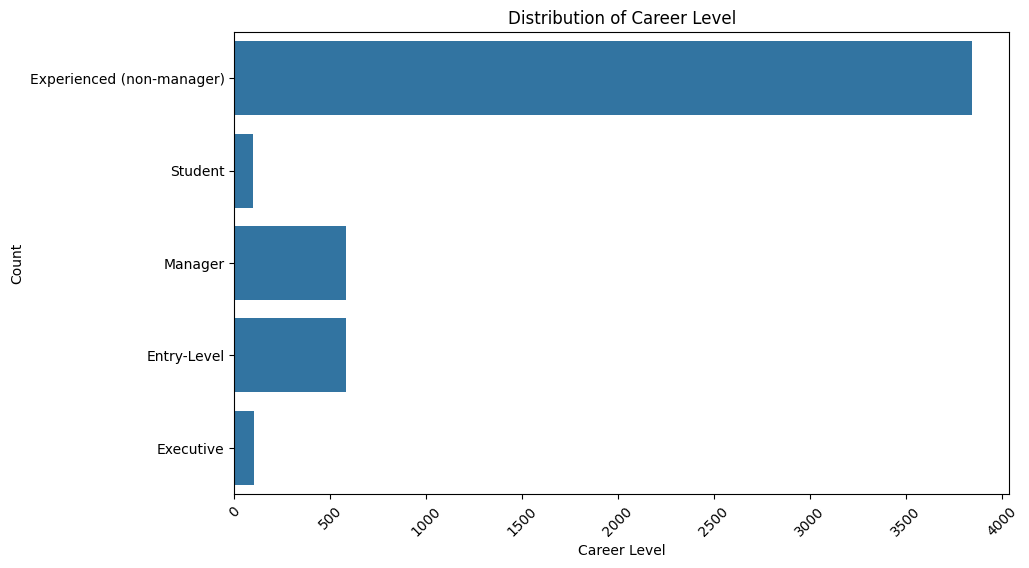

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data['Career Level'])
plt.title('Distribution of Career Level')
plt.xlabel('Career Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

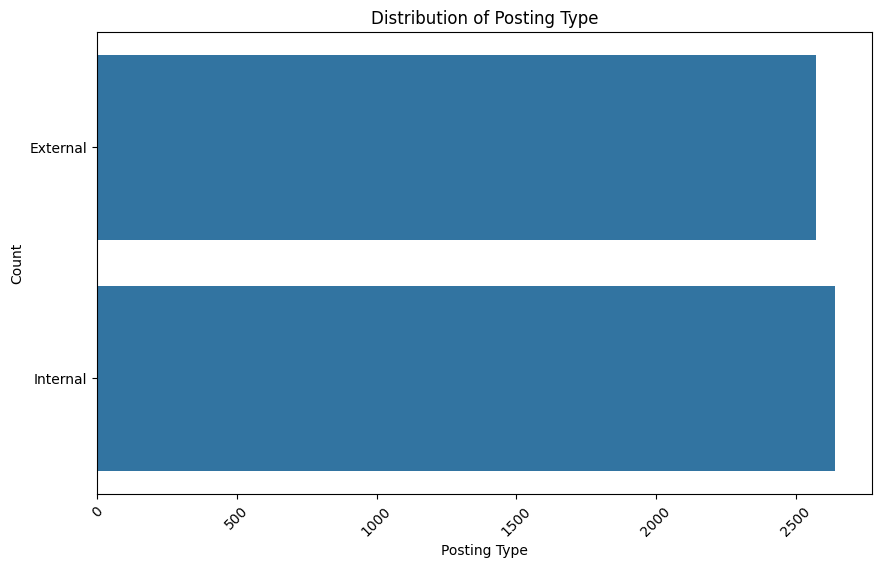

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data['Posting Type'])
plt.title('Distribution of Posting Type')
plt.xlabel('Posting Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [33]:
# Encoding categorical features
label_encoder = LabelEncoder()
data['Job Title Encoded'] = label_encoder.fit_transform(data['Business Title'])

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

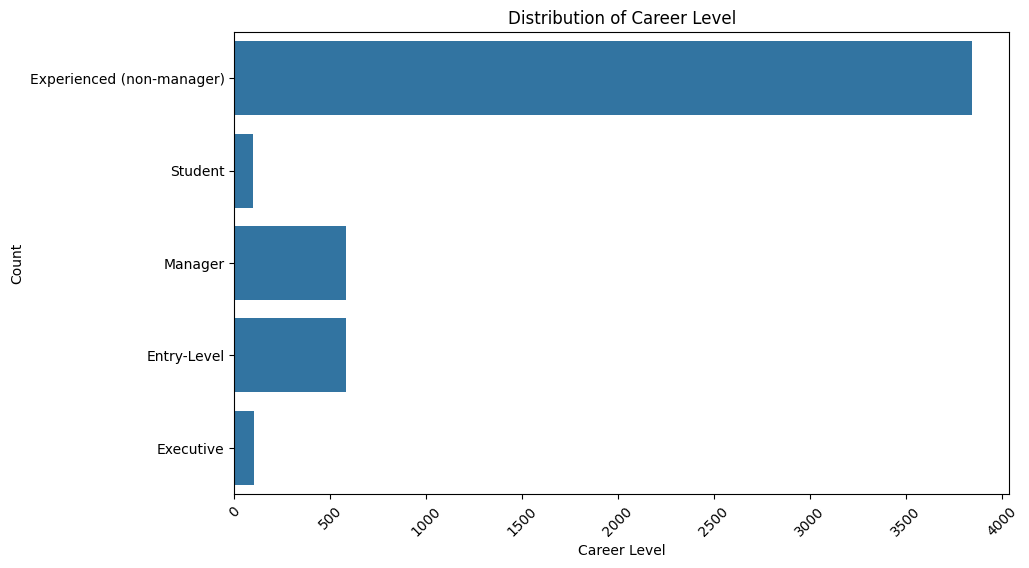

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data['Career Level'])
plt.title('Distribution of Career Level')
plt.xlabel('Career Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

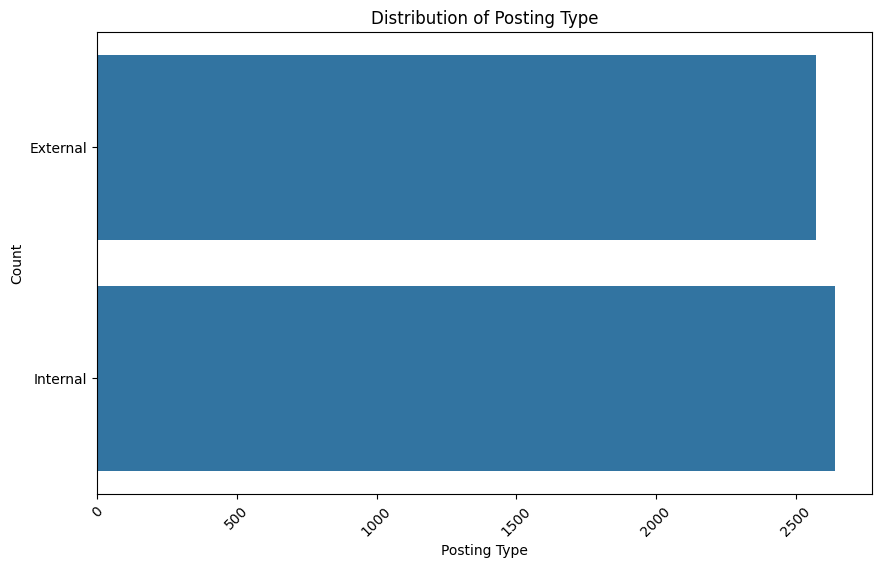

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data['Posting Type'])
plt.title('Distribution of Posting Type')
plt.xlabel('Posting Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [37]:
from wordcloud import WordCloud

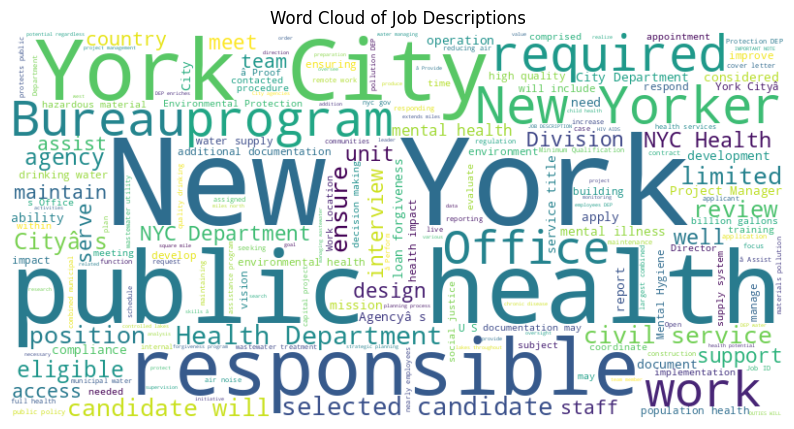

In [38]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Job Description'].fillna('')))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Descriptions')
plt.show()

In [47]:
# Verify the column names in your DataFrame
print(data.columns)

# Assuming 'Status' column indicates if the job is still open
X = data[['Job Title Encoded', 'Posting Year', 'Posting Month']]

# Replace 'CorrectColumnName' with the actual name of the column
# that indicates the job status (open/closed)
y = label_encoder.fit_transform(data['Post Until'])  # Convert 'Open'/'Closed' to 0/1

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date', 'Posting Year',
       'Posting Month', 'Job Title Encoded'],
      dtype='object')


In [48]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Step 7: Model Selection and Training
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
# Step 8: Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8897411313518696
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         2
           7       1.00      0.86      0.92         7
           8       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         4
          21       0.00      0.00      0.00         2
          23       1.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [51]:
# Step 9: Feature Importance
importances = model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
              Feature  Importance
0  Job Title Encoded    0.884289
2      Posting Month    0.068728
1       Posting Year    0.046983
